# Craft Beer Prediction Model

For this project, I will be taking a dataset of canned craft beers and using it to predict the Alcohol By Volume (ABV) by finding the best model.

The dataset I will be using has the following columns:

* abv: Alcohol by Volume. This is the dependent variable I will be predicting
* ibu: International Bitterness Units: how bitter the beer is
* id: Unique ID for each beer
* name: The name of the beer
* style: The style of beer
* brewery_id: The ID of the brewery corresponding to the brewery name located in brewery.csv
* ounces: How many ounces of beer is sold in the can

In [805]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Step 1: Exploratory Data Analysis

In [806]:
beers=pd.read_csv('beers.csv')
beers.head(15)

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
5,5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0
6,6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0
7,7,0.065,NaN,2259,Foreman,American Porter,177,12.0
8,8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0
9,9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0


In [807]:
beers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
Unnamed: 0    2410 non-null int64
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
name          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.7+ KB


In [808]:
beers.describe()

,Unnamed: 0,abv,ibu,id,brewery_id,ounces
count,2410.000000,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,1204.500000,0.059773,42.713167,1431.113278,231.749793,13.592241
std,695.851397,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.000000,0.001000,4.000000,1.000000,0.000000,8.400000
25%,602.250000,0.050000,21.000000,808.250000,93.000000,12.000000
50%,1204.500000,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,1806.750000,0.067000,64.000000,2075.750000,366.000000,16.000000
max,2409.000000,0.128000,138.000000,2692.000000,557.000000,32.000000


In [809]:
# We don't need the Unnamed column or the id column as these are all unique identifiers and don't provide any information

beers.drop(columns=(['Unnamed: 0','id']), inplace=True)
beers.head()

,abv,ibu,name,style,brewery_id,ounces
0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,Sex and Candy,American IPA,177,12.0


In [810]:
# We want to make sure to drop any duplicate rows

beers.drop_duplicates(inplace=True)
beers.head()

,abv,ibu,name,style,brewery_id,ounces
0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,Sex and Candy,American IPA,177,12.0


In [811]:
beers.abv.isnull().sum()

62

There are 62 beers that are missing values for the ABV. The easiest option would be to drop them, but I want to be sure there isn't a pattern to the beers that are missing the ABV; that is, I want to make sure I don't skew the data by removing these beers. Let's take a look at them.

In [812]:
beers[beers.abv.isnull()]

,abv,ibu,name,style,brewery_id,ounces
294,NaN,NaN,Double Play Pilsner,American Pilsner,380,12.0
299,NaN,NaN,N Street Drive-In 50th Anniversary IPA,American Double / Imperial IPA,380,12.0
315,NaN,NaN,Professor Black,American Stout,77,12.0
316,NaN,NaN,Little Boss,American Pale Wheat Ale,77,12.0
317,NaN,NaN,Van Dayum!,American Amber / Red Ale,77,12.0
318,NaN,NaN,Spirit Animal,American Pale Ale (APA),77,12.0
407,NaN,NaN,Fat Paczki,Belgian Dark Ale,10,16.0
408,NaN,NaN,Earth-Like Planets,Belgian Pale Ale,10,16.0
450,NaN,NaN,Tampa Pale Ale,American Pale Ale (APA),467,12.0
451,NaN,NaN,Orange Grove Wheat Ale,American Pale Wheat Ale,467,12.0


What immediately becomes apparent is that it appears that entire breweries are missing data for the ABV, as most of the breweries appear more than once on this list. However, given the fact that a large range of styles are represented as well as the fact that all of these beers are also missing values for IBU, the best thing to do will be to drop these beers from the data set.

In [813]:
beers.dropna(subset=['abv'], inplace=True)
beers.reset_index(drop=True, inplace=True)
beers.head(30)

,abv,ibu,name,style,brewery_id,ounces
0,0.050,NaN,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,Sex and Candy,American IPA,177,12.0
5,0.077,NaN,Black Exodus,Oatmeal Stout,177,12.0
6,0.045,NaN,Lake Street Express,American Pale Ale (APA),177,12.0
7,0.065,NaN,Foreman,American Porter,177,12.0
8,0.055,NaN,Jade,American Pale Ale (APA),177,12.0
9,0.086,NaN,Cone Crusher,American Double / Imperial IPA,177,12.0


In [814]:
beers.shape

(2315, 6)

## Ounces

The ounces of beer in the can is based on how the brewery decides to can their beer, so it is not a helpful category for feature engineering, so I will not be using this column.

In [815]:
beers.drop(columns='ounces', inplace=True)

### Style

In [816]:
beers[beers['style'].isnull()]

,abv,ibu,name,style,brewery_id
816,0.060,21.0,Kilt Lifter Scottish-Style Ale,NaN,160
829,0.053,27.0,OktoberFiesta,NaN,66


Since these two rows are only missing style and nothing else, I will impute with the style that makes the most sense. The first once is a Scottish Ale, and the second can sensibly be considered an Octoberfest beer.

In [817]:
beers.loc[816,'style']='Scottish Ale'
beers.loc[829,'style']='Märzen / Oktoberfest'

In [818]:
beers['style'].value_counts().head(10)

American IPA                      412
American Pale Ale (APA)           236
American Amber / Red Ale          125
American Blonde Ale               104
American Double / Imperial IPA    101
American Pale Wheat Ale            83
American Brown Ale                 68
American Porter                    65
Saison / Farmhouse Ale             52
Fruit / Vegetable Beer             48
Name: style, dtype: int64

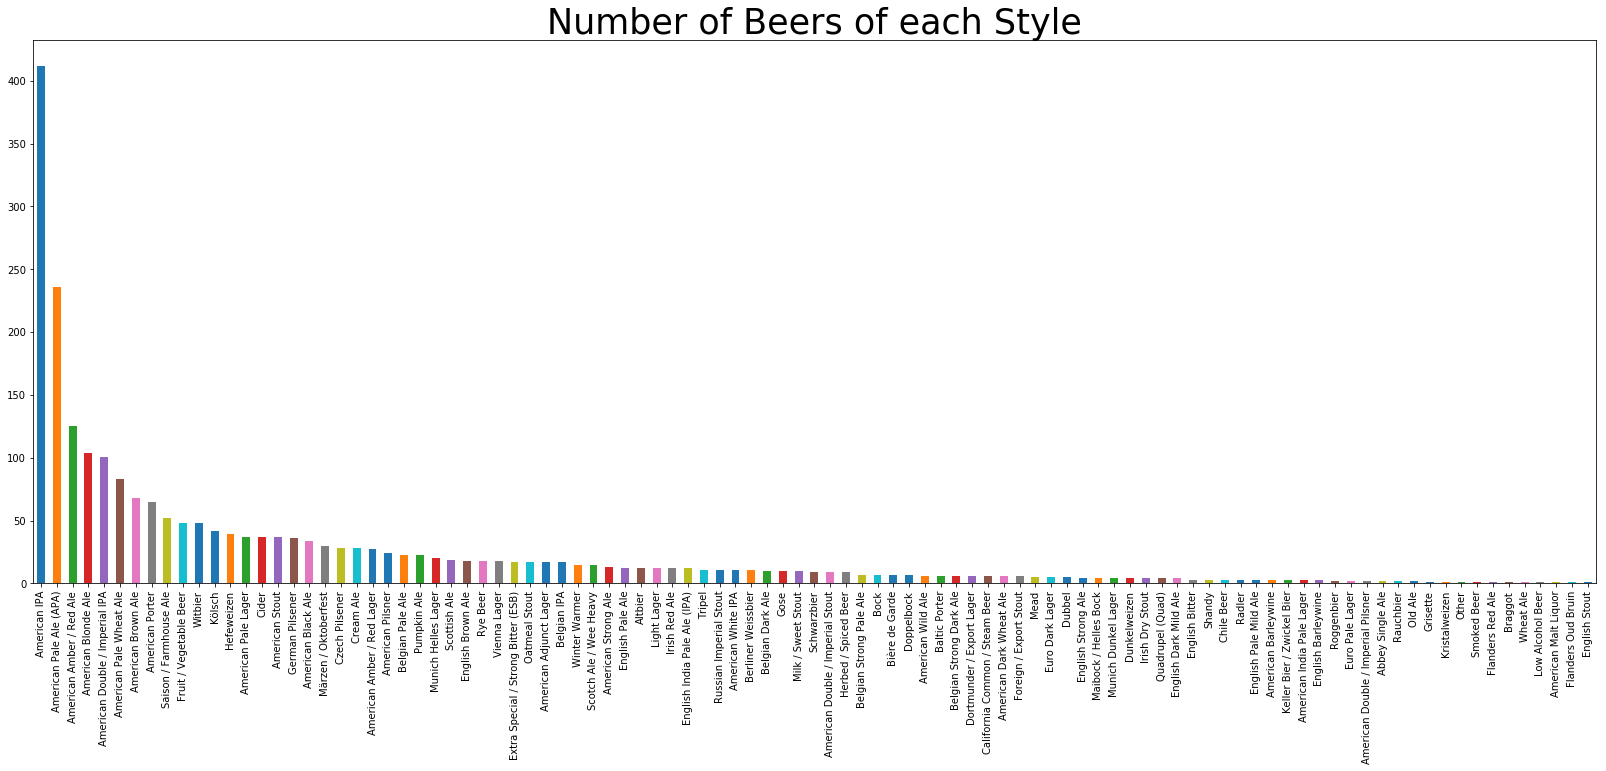

In [819]:
plot=beers['style'].value_counts().plot(kind='bar', figsize=(28,10))
plot.set_title('Number of Beers of each Style', fontsize=35);

Immediately, we see that there are a lot of beer styles represented, but many of them have only a couple beers in the dataset of that style, so this poses a problem. Generally, we want a sample size of at least 10. Due to the high number of styles that have less than 10 samples, I will find just the styles that have less than 3 samples, and change the style to the most similar one that has more sample sizes.

In [820]:
# Take the value counts of beers and filter out values greater than 4

beers['style'].value_counts()[beers['style'].value_counts() < 3]

Roggenbier                            2
Euro Pale Lager                       2
American Double / Imperial Pilsner    2
Abbey Single Ale                      2
Rauchbier                             2
Old Ale                               2
Grisette                              1
Kristalweizen                         1
Other                                 1
Smoked Beer                           1
Flanders Red Ale                      1
Braggot                               1
Wheat Ale                             1
Low Alcohol Beer                      1
American Malt Liquor                  1
Flanders Oud Bruin                    1
English Stout                         1
Name: style, dtype: int64

I have researched all of these beer styles and found the style that most closely resembles each one.

In [821]:
beers.loc[beers['style']=='Old Ale','style']='English Strong Ale'

In [822]:
beers.loc[beers['style']=='Roggenbier','style']='Rye Beer'

In [823]:
beers.loc[beers['style']=='Abbey Single Ale','style']='Belgian Pale Ale'

In [824]:
beers.loc[beers['style']=='Smoked Beer','style']='Rauchbier'

In [825]:
beers.loc[beers['style']=='Euro Pale Lager','style']='Munich Helles Lager'

In [826]:
beers.loc[beers['style']=='American Double / Imperial Pilsner','style']='American India Pale Lager'

In [827]:
beers.loc[beers['style']=='Wheat Ale','style']='American Pale Wheat Ale'

In [828]:
beers.loc[beers['style']=='American Malt Liquor','style']='English Strong Ale'

In [829]:
beers.loc[beers['style']=='English Stout','style']='Foreign / Export Stout'

In [830]:
beers.loc[beers['style']=='Flanders Red Ale','style']='Flanders Oud Bruin'

In [831]:
beers.loc[beers['style']=='Grisette','style']='Saison / Farmhouse Ale'

In [832]:
beers.loc[beers['style']=='Braggot','style']='Herbed / Spiced Beer'

In [833]:
beers.loc[beers['style']=='Kristalweizen','style']= 'Hefeweizen'

In [834]:
beers[beers['style']=='Other']

,abv,ibu,name,style,brewery_id
214,0.048,16.0,Bunker Hill Blueberry Ale,Other,103


In [835]:
beers.loc[beers['style']=='Other','style']= 'Fruit / Vegetable Beer'

In [836]:
# I will drop the Low Alcohol Beer, since it is irrelevant for our purposes

beers.drop(beers.loc[beers['style']=='Low Alcohol Beer','style'].index, inplace=True)
beers.reset_index(drop=True, inplace=True)

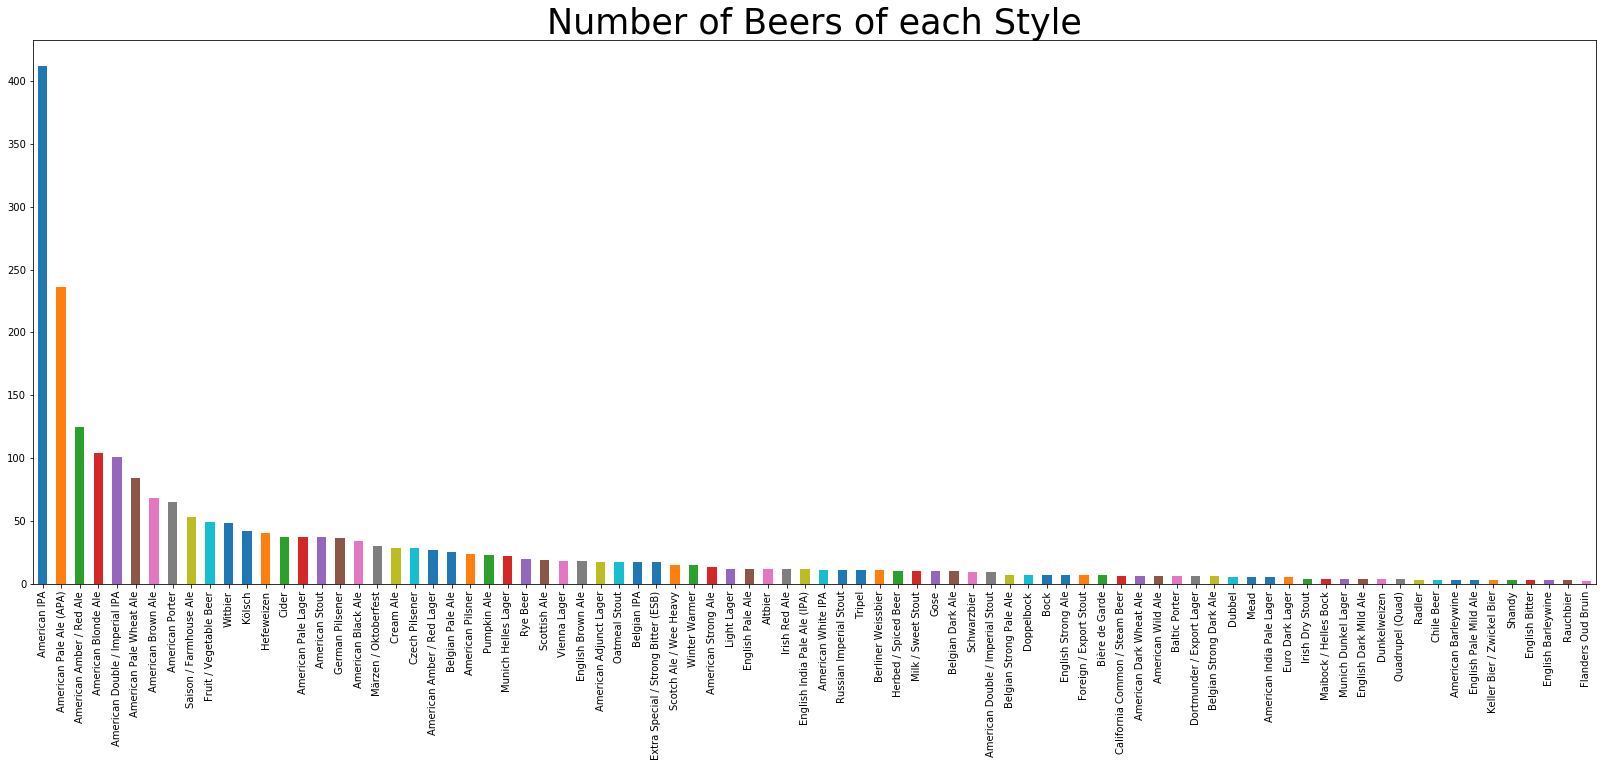

In [837]:
plot=beers['style'].value_counts().plot(kind='bar', figsize=(28,10))
plot.set_title('Number of Beers of each Style', fontsize=35);

Text(0.5,0,'')

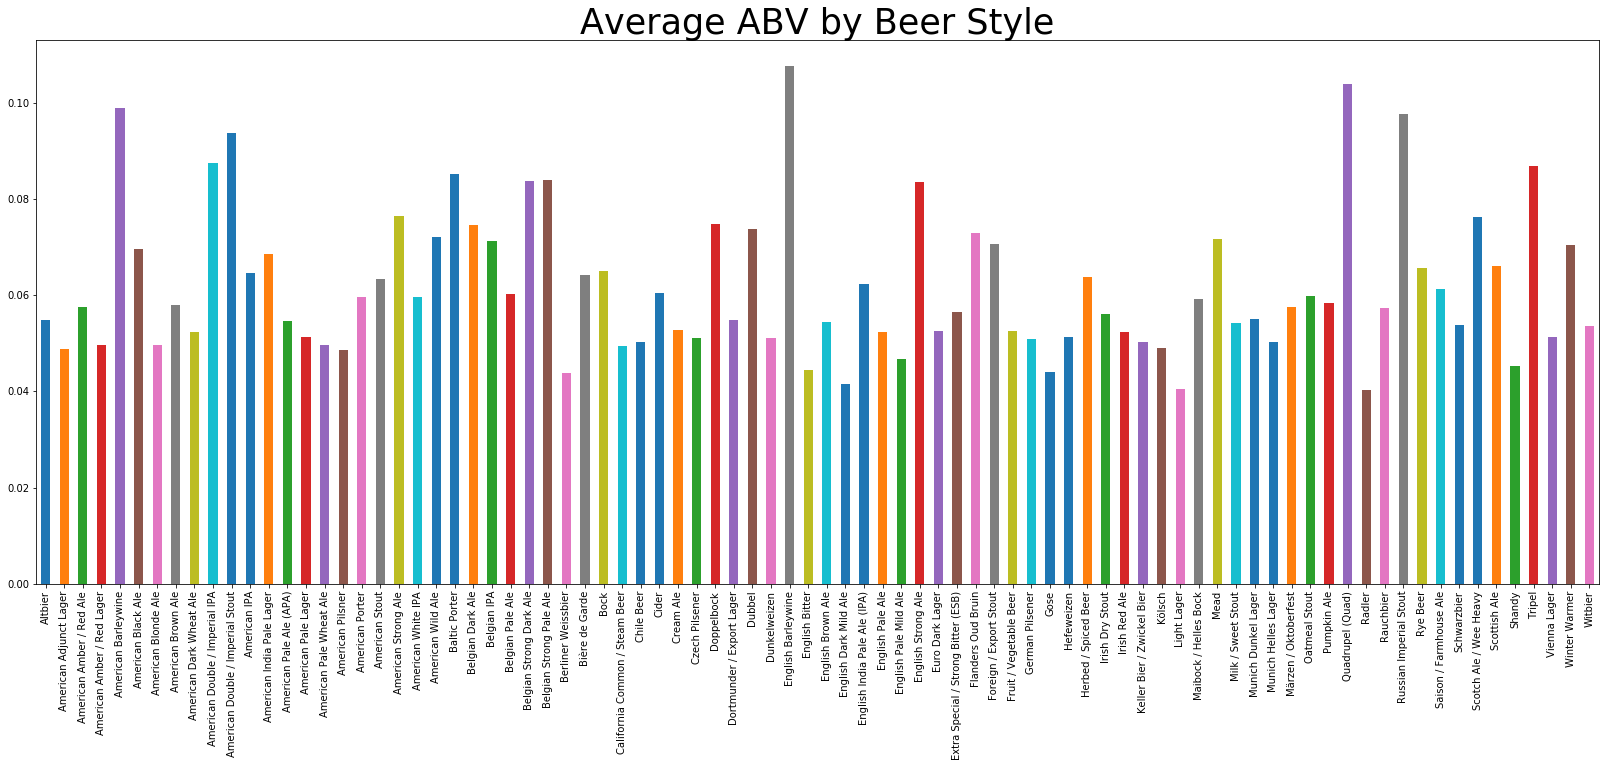

In [838]:
plot2=beers.groupby('style').abv.mean().plot(kind='bar', figsize=(28,10))
plot2.set_title('Average ABV by Beer Style', fontsize=35)
plot2.set_xlabel('')

Looking at this graph, we can see that certain styles of beer stand out, and we can pull out keywords that are associated with a higher ABV, such as "Imperial" and "Barleywine".

### IBU

The IBU column has a lot of data missing, but based on what I know about beer, my hypothesis is that IBU and ABV are highly corrolated, so it wouldn't be wise to throw out that column. First, I'll test my hypothesis.

In [839]:
beers[['abv', 'ibu']].corr()

,abv,ibu
abv,1.000000,0.668108
ibu,0.668108,1.000000


The corrolation coefficient is .668, which is definitely high enough to warrant not throwing out. Therefore, I will impute the IBU by taking the median IBU of the corresponding style of beer, since that is the only other data we have that is related to IBU.

In [840]:
beers.dropna().head(10)

,abv,ibu,name,style,brewery_id
14,0.061,60.0,Bitter Bitch,American Pale Ale (APA),177
21,0.099,92.0,Lower De Boom,American Barleywine,368
22,0.079,45.0,Fireside Chat,Winter Warmer,368
24,0.044,42.0,Bitter American,American Pale Ale (APA),368
25,0.049,17.0,Hell or High Watermelon Wheat (2009),Fruit / Vegetable Beer,368
26,0.049,17.0,21st Amendment Watermelon Wheat Beer (2006),Fruit / Vegetable Beer,368
27,0.070,70.0,21st Amendment IPA (2006),American IPA,368
28,0.070,70.0,Brew Free! or Die IPA (2008),American IPA,368
29,0.070,70.0,Brew Free! or Die IPA (2009),American IPA,368
30,0.085,52.0,Special Edition: Allies Win The War!,English Strong Ale,368


In [841]:
ibu_by_style=beers.groupby('style').ibu.mean()
ibu_by_style

style
Altbier                             33.285714
American Adjunct Lager              11.200000
American Amber / Red Ale            36.298701
American Amber / Red Lager          23.600000
American Barleywine                 96.000000
American Black Ale                  68.900000
American Blonde Ale                 20.983607
American Brown Ale                  29.894737
American Dark Wheat Ale             27.600000
American Double / Imperial IPA      92.863014
American Double / Imperial Stout    62.000000
American IPA                        67.468013
American India Pale Lager           68.750000
American Pale Ale (APA)             44.675497
American Pale Lager                 26.750000
American Pale Wheat Ale             21.040000
American Pilsner                    23.285714
American Porter                     31.923077
American Stout                      41.312500
American Strong Ale                 65.416667
American White IPA                  48.833333
American Wild Ale           

There are some styles that have no IBU data at all to use, so I will have to find another way to deal with those.

In [842]:
ibu_by_style[ibu_by_style.isnull()]

style
Cider    NaN
Mead     NaN
Shandy   NaN
Name: ibu, dtype: float64

Thankfully this list is small enough that I can do some research to figure out what to do with each category.

In [843]:
beers[beers['style']=='Cider'].head()

,abv,ibu,name,style,brewery_id
15,0.06,NaN,Ginja Ninja,Cider,154
16,0.06,NaN,Cherried Away,Cider,154
17,0.06,NaN,Rhubarbarian,Cider,154
18,0.06,NaN,BrightCider,Cider,154
120,0.05,NaN,Angry Orchard Apple Ginger,Cider,434


IBU doesn't apply to cider, so I will impute these as 0.

In [844]:
beers.loc[beers['style']=='Cider','ibu']=0

In [845]:
beers.loc[2178,'ibu']=0

In [846]:
beers[beers['style']=='Mead']

,abv,ibu,name,style,brewery_id
301,0.059,NaN,Yellow Collar,Mead,422
302,0.059,NaN,Green Collar,Mead,422
1631,0.080,NaN,Nectar of the Hops,Mead,421
1632,0.080,NaN,Sunshine Nectar,Mead,421
1633,0.080,NaN,Black Raspberry Nectar,Mead,421


As with ciders, mead doesn't have an IBU.

In [847]:
beers.loc[beers['style']=='Mead','ibu']=0

In [848]:
beers[beers['style']=='Shandy']

,abv,ibu,name,style,brewery_id
1229,0.042,NaN,Saranac Shandy,Shandy,299
2081,0.044,NaN,Curious Traveler Shandy,Shandy,334
2117,0.050,NaN,Big Island Shandy,Shandy,474


I couldn't find any IBU information for any of these, so I will just impute 0.

In [849]:
beers.loc[beers['style']=='Shandy','ibu']=0

In [850]:
# Now I will impute each missing IBU value with the mean of its corresponding style

beers.ibu = beers.groupby('style')['ibu'].transform(lambda x: x.fillna(x.mean()))

In [851]:
beers.head()

,abv,ibu,name,style,brewery_id
0,0.050,26.750000,Pub Beer,American Pale Lager,408
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177
2,0.071,67.468013,Rise of the Phoenix,American IPA,177
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177
4,0.075,67.468013,Sex and Candy,American IPA,177


Now the IBU column is completely filled in. Let's check and make sure there are no remaining null values.

In [852]:
beers.isnull().sum()

abv           0
ibu           0
name          0
style         0
brewery_id    0
dtype: int64

### Brewery

We can take a look at the individual breweries to get a sense of how strong their beers are. 

In [853]:
beers.brewery_id.value_counts()

10     60
25     36
166    27
141    25
46     24
131    21
165    20
107    19
368    19
30     19
45     18
51     18
365    18
171    17
82     17
43     15
240    15
309    15
177    14
155    14
118    14
503    13
61     13
299    13
1      13
134    13
80     12
371    12
175    12
190    12
       ..
89      1
95      1
99      1
111     1
501     1
162     1
505     1
113     1
123     1
137     1
381     1
55      1
194     1
196     1
554     1
520     1
526     1
538     1
238     1
232     1
552     1
555     1
39      1
429     1
427     1
9       1
19      1
23      1
31      1
557     1
Name: brewery_id, Length: 546, dtype: int64

The brewery with the most beers has 60 different beers, but as we can see, it seems the majority of breweries only have one beer in the list, which leaves our sample size with something to be desired. However, for breweries with more than 10 beers, we will gain insight into how their ABVs vary by beer style, which will be helpful when predicting ABV of future beers that come from those breweries.

In [854]:
beers.groupby('brewery_id').abv.mean().sort_values(ascending=False)

brewery_id
274    0.099000
99     0.089000
306    0.088000
64     0.083500
260    0.082000
322    0.081000
423    0.080667
354    0.080000
421    0.080000
28     0.080000
304    0.080000
346    0.080000
389    0.079333
272    0.077200
509    0.077000
317    0.076200
503    0.076154
51     0.076111
376    0.075333
280    0.075333
172    0.075000
166    0.074556
444    0.074200
432    0.074000
522    0.073750
350    0.073250
208    0.073000
95     0.073000
5      0.072833
18     0.072000
         ...   
319    0.045000
90     0.045000
56     0.045000
538    0.045000
543    0.045000
381    0.045000
187    0.045000
427    0.045000
492    0.045000
245    0.044500
476    0.044500
334    0.044000
349    0.042000
238    0.042000
189    0.042000
318    0.041667
504    0.041667
271    0.041500
129    0.041000
281    0.041000
348    0.040000
399    0.040000
505    0.040000
259    0.040000
42     0.039000
512    0.038000
162    0.038000
373    0.038000
448    0.037000
249    0.035000
Name: abv, Le

It's safe to assume that most of the breweries at the top and bottom of this list have at most a couple beers represented that happen to be a particularly strong style of beer, so this information isn't too helpful.

### Brewery Location

In [855]:
beers.brewery_id.value_counts().head(10)

10     60
25     36
166    27
141    25
46     24
131    21
165    20
107    19
368    19
30     19
Name: brewery_id, dtype: int64

In [856]:
breweries=pd.read_csv('breweries.csv')

In [857]:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


In [858]:
breweries.drop(columns='Unnamed: 0', inplace=True)

In [859]:
breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [860]:
breweries.state.value_counts()

 CO    47
 CA    39
 MI    32
 OR    29
 TX    28
 PA    25
 MA    23
 WA    23
 IN    22
 WI    20
 NC    19
 IL    18
 VA    16
 NY    16
 FL    15
 OH    15
 MN    12
 AZ    11
 VT    10
 MT     9
 ME     9
 MO     9
 CT     8
 AK     7
 MD     7
 GA     7
 OK     6
 IA     5
 RI     5
 NE     5
 ID     5
 LA     5
 NM     4
 HI     4
 KY     4
 WY     4
 UT     4
 SC     4
 NH     3
 AL     3
 KS     3
 TN     3
 NJ     3
 AR     2
 DE     2
 MS     2
 NV     2
 DC     1
 SD     1
 WV     1
 ND     1
Name: state, dtype: int64

Now I will take the city and state of each brewery and put it in my beers dataframe so that I can gain insight about the beers based on location.

In [861]:
# I will do a .loc search where the rows are the brewery_id in the "beers" dataframe, which corresponds to the index of the
# "breweries" dataframe, and the column is either city or state, then by resetting the index, it will match up with the index of
# the "beers" dataframe, allowing me to add on a new column.

beer_cities=breweries.loc[beers.brewery_id,'city'].reset_index(drop=True)
beer_states=breweries.loc[beers.brewery_id,'state'].reset_index(drop=True)

In [862]:
beers['city']=beer_cities
beers['state']=beer_states
beers.head(30)

,abv,ibu,name,style,brewery_id,city,state
0,0.050,26.750000,Pub Beer,American Pale Lager,408,Bend,OR
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177,Gary,IN
2,0.071,67.468013,Rise of the Phoenix,American IPA,177,Gary,IN
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177,Gary,IN
4,0.075,67.468013,Sex and Candy,American IPA,177,Gary,IN
5,0.077,29.600000,Black Exodus,Oatmeal Stout,177,Gary,IN
6,0.045,44.675497,Lake Street Express,American Pale Ale (APA),177,Gary,IN
7,0.065,31.923077,Foreman,American Porter,177,Gary,IN
8,0.055,44.675497,Jade,American Pale Ale (APA),177,Gary,IN
9,0.086,92.863014,Cone Crusher,American Double / Imperial IPA,177,Gary,IN


Text(0.5,0,'')

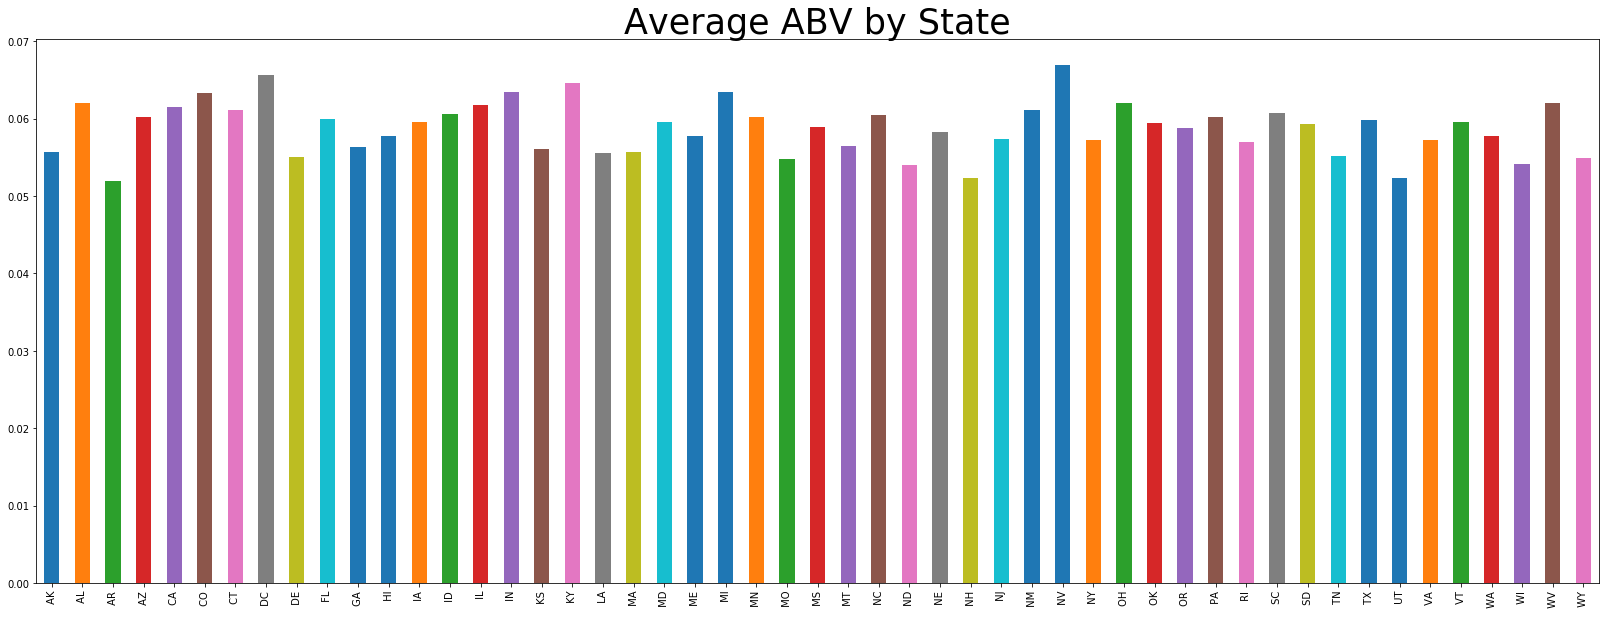

In [863]:
plot=beers.groupby('state').abv.mean().plot(kind='bar', figsize=(28,10))
plot.set_title('Average ABV by State', fontsize=35)
plot.set_xlabel('')

This is obviously a bit misleading since many states have a very small sample size. Nevertheless, we can do some more exploring to figure out why these discrepencies exist. To start, we can look at the most common beer style by state to gain some insights.

In [864]:
# I grouped beers by state and found the top style for each state

top_styles=beers.groupby('state')['style'].describe()['top']
top_styles

state
 AK                      American IPA
 AL           American Pale Ale (APA)
 AR           American Pale Ale (APA)
 AZ                      American IPA
 CA                      American IPA
 CO                      American IPA
 CT          American Amber / Red Ale
 DC                        Hefeweizen
 DE           American Pale Ale (APA)
 FL                      American IPA
 GA           American Pale Ale (APA)
 HI                      American IPA
 IA               American Blonde Ale
 ID           American Pale Ale (APA)
 IL           American Pale Ale (APA)
 IN                      American IPA
 KS           American Pale Wheat Ale
 KY                      American IPA
 LA           American Pale Ale (APA)
 MA                      American IPA
 MD                      American IPA
 ME                      American IPA
 MI                      American IPA
 MN                      American IPA
 MO                      American IPA
 MS           American Pale Ale (APA)
 MT   

In [865]:
top_styles.value_counts()

American IPA                      29
American Pale Ale (APA)           12
American Blonde Ale                2
Hefeweizen                         1
American Porter                    1
American Pale Wheat Ale            1
American Double / Imperial IPA     1
Schwarzbier                        1
American Black Ale                 1
American Amber / Red Ale           1
Berliner Weissbier                 1
Name: top, dtype: int64

Text(0,0.5,'Number of States')

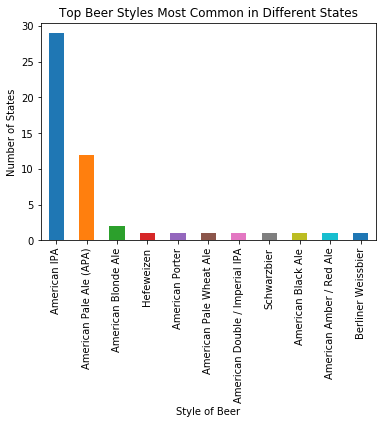

In [866]:
plot2=top_styles.value_counts().plot(kind='bar')
plot2.set_title('Top Beer Styles Most Common in Different States')
plot2.set_xlabel('Style of Beer')
plot2.set_ylabel('Number of States')

Unsurprisingly, American IPAs are overwhelmingly the most common beer style. Looking at the states where the most common beer style is not the IPA, I found that there were a concentration of states in the midwest where the most common beer is the American Pale Ale, which was the case in Wisconson, Illinois, Kansas, and Iowa. I was hoping to find more variety based on the region of the country, but it is apparent that IPAs are overwhelmingly popular nationwide.

To gain more insight into region of the country, I will make a new feature for region, which I will designate as Northeast, South, Midwest, and West.

In [867]:
beers.state.values

array([' OR', ' IN', ' IN', ..., ' CO', ' CO', ' CO'], dtype=object)

In [868]:
# Noting that that the state codes have a space in front of them, I will make a list for each region containing each state code
# in that region. Then I will make a new region column and fill in the region for each beer.

Northeast=[' ME',' NH',' VT',' MA',' CT',' RI',' NY',' PA',' NJ']
South=[' DE',' MD',' DC',' VA',' WV',' NC',' SC',' KY',' TN',' MS',' AL',' GA',' FL',' LA',' TX',' OK',' AR']
Midwest=[' OH',' MI',' IN',' IL',' MO',' KS',' IA',' WI',' MN',' ND',' SD',' NE']
West=[' MT',' ID',' WY',' CO',' NM',' AZ',' UT',' NV',' CA',' OR',' WA',' AK',' HI']

beers['region']='Northeast'
for i in range(0,len(beers.state) - 1):
    if beers.loc[i,'state'] in South:
        beers.loc[i,'region']='South'
    elif beers.loc[i,'state'] in Midwest:
        beers.loc[i,'region']='Midwest'
    elif beers.loc[i,'state'] in West:
        beers.loc[i,'region']='West'

In [869]:
beers.head()

,abv,ibu,name,style,brewery_id,city,state,region
0,0.050,26.750000,Pub Beer,American Pale Lager,408,Bend,OR,West
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177,Gary,IN,Midwest
2,0.071,67.468013,Rise of the Phoenix,American IPA,177,Gary,IN,Midwest
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177,Gary,IN,Midwest
4,0.075,67.468013,Sex and Candy,American IPA,177,Gary,IN,Midwest


Now I will graph the most popular beers by region to see if there were any insights I missed.

Text(0.5,1,'Most Popular Beers by Region')

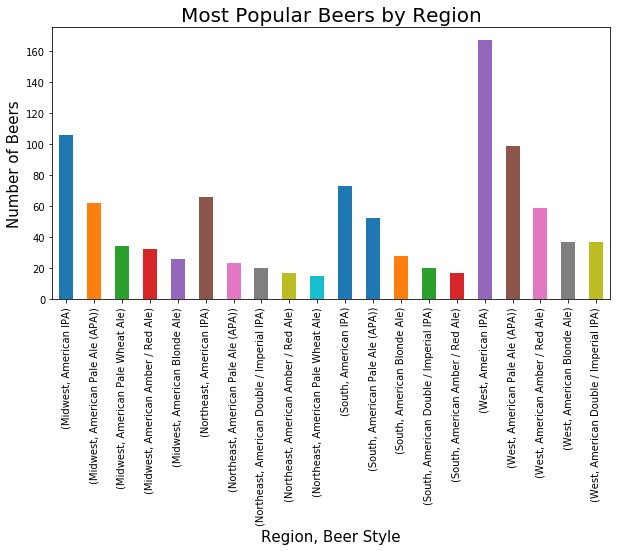

In [870]:
def top_value_count(x, n=5):
    return x.value_counts().head(n)

plot=beers.groupby('region').style.apply(top_value_count).plot(kind='bar', figsize=(10,5))
plot.set_xlabel('Region, Beer Style', fontsize=15)
plot.set_ylabel('Number of Beers', fontsize=15)
plot.set_title('Most Popular Beers by Region', fontsize=20)

We can see from this graph that American IPA and American Pale Ale are the top two beer styles across the country, but from there, each region differs slightly. All regions have an American Amber Ale among the top 5, but the remaining 2 categories are split between American Imperial IPA, American Pale Wheat, and American Blonde, with each region missing one of those three in their top 5. Whether this information will help our machine learning is unclear, but we can certainly use Region as a feature.

### Beer Name

I wanted to talk about the beer names because there are a couple options I could consider. I could use Natural Language Processing on the beer names to get additional features, but the problem with that is the way that the beer names are entered. Some of the beer names include the style of beer they are (e.g. "Brew Free or Die IPA"), but many do not, which gives unfair weight to the former. Therefore, I am deciding to withhold using NLP on the beer names and will instead ignore them completely for my feature engineering.

## Step 2: Feature Engineering

Now that I have sufficiently explored my features, I will now do feature engineering to prepare my data for modeling. I will need to convert my categorical data to numerical, as well as normalize my data.

### Converting data to Numerical

In [871]:
beers.head()

,abv,ibu,name,style,brewery_id,city,state,region
0,0.050,26.750000,Pub Beer,American Pale Lager,408,Bend,OR,West
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177,Gary,IN,Midwest
2,0.071,67.468013,Rise of the Phoenix,American IPA,177,Gary,IN,Midwest
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177,Gary,IN,Midwest
4,0.075,67.468013,Sex and Candy,American IPA,177,Gary,IN,Midwest


In [872]:
# I will be one-hot encoding the style, city, state, and region columns.

style_dummies=pd.get_dummies(beers['style'], prefix='style')
city_dummies=pd.get_dummies(beers.city, prefix='city')
state_dummies=pd.get_dummies(beers.state, prefix='state')
region_dummies=pd.get_dummies(beers.region, prefix='region')
style_dummies.drop(style_dummies.columns[0], axis=1, inplace=True)
city_dummies.drop(city_dummies.columns[0], axis=1, inplace=True)
state_dummies.drop(state_dummies.columns[0], axis=1, inplace=True)
region_dummies.drop(region_dummies.columns[0], axis=1, inplace=True)

In [873]:
# Creating a features dataframe by concatenating all of the dummies to the main frame and dropping the target

features=pd.concat([beers, style_dummies, city_dummies, state_dummies, region_dummies], axis=1)
features.drop(columns=['name', 'style', 'city', 'state', 'region','abv'], inplace=True)
features.head()

,ibu,brewery_id,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,style_American Blonde Ale,style_American Brown Ale,style_American Dark Wheat Ale,...,state_ UT,state_ VA,state_ VT,state_ WA,state_ WI,state_ WV,state_ WY,region_Northeast,region_South,region_West
0,26.750000,408,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44.675497,177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67.468013,177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92.863014,177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,67.468013,177,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [913]:
features.shape

(2314, 513)

### Regularization

Since I have so many one-hot encoded variables, it seems sensible to use Lasso Regularization to remove some of the less useful columns, so before I do that, I need to normalize the data.

In [874]:
X=features
y=beers.abv

In [875]:
from sklearn.linear_model import Ridge

ridgereg = Ridge(normalize=True)

## Step 3: Train and Test Models

### Train, Test, Split

In [876]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)

### Linear Regression without Regularization

In [877]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Instantiate and fit model

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# Predict test data

y_pred = lr.predict(X_test)
beers['predict']=lr.predict(X)

# Calculate Error

metrics.mean_squared_error(y_test, y_pred)

3.911522748718023e+24

Ok, that was not the MSE I was hoping for. That number is huge! I was expecting the predictions to be at the very least between 0 and 1, so let's see where we went wrong.

In [878]:
beers[(beers.predict<0) | (beers.predict>1)]

,abv,ibu,name,style,brewery_id,city,state,region,predict
89,0.057,44.675497,Hopalicious,American Pale Ale (APA),73,Madison,WI,Midwest,2.130833e+13
189,0.070,46.000000,Thai.p.a,American IPA,20,Granger,IN,Midwest,-9.675893e+11
622,0.038,26.750000,Chester's Beer (2005),American Pale Lager,512,Pawcatuck,CT,Northeast,1.991163e+13
777,0.055,44.675497,Moped Traveler,American Pale Ale (APA),54,Lombard,IL,Midwest,-1.225338e+13
849,0.072,50.000000,No Wake IPA,American IPA,228,Lake Geneva,WI,Midwest,7.085782e+12
850,0.049,15.000000,Boathouse Blonde,American Blonde Ale,228,Lake Geneva,WI,Midwest,7.085782e+12
851,0.050,26.000000,Cedar Point,American Amber / Red Ale,228,Lake Geneva,WI,Midwest,7.085782e+12
852,0.067,70.000000,Clean Shave IPA,American IPA,106,Pineland,ME,Northeast,-1.140897e+12
1074,0.055,37.000000,Thunder Ann,American Pale Ale (APA),312,Nashville,TN,South,-7.911580e+12
1080,0.069,67.468013,Welcome to Scoville,American IPA,114,Laurel,MD,South,1.101608e+13


Ok so there's at least only a countable number of predictions that went off the rails. Now I have to figure out why that happened. One pattern I am noticing is certain breweries are showing up more than once. For instance, the beers from brewery 228 in Lake Geneva were all predicted wildly incorrectly, even though the styles of those beers were some of the most common.

In [879]:
beers[beers.city == 'Lake Geneva']

,abv,ibu,name,style,brewery_id,city,state,region,predict
849,0.072,50.0,No Wake IPA,American IPA,228,Lake Geneva,WI,Midwest,7.085782e+12
850,0.049,15.0,Boathouse Blonde,American Blonde Ale,228,Lake Geneva,WI,Midwest,7.085782e+12
851,0.050,26.0,Cedar Point,American Amber / Red Ale,228,Lake Geneva,WI,Midwest,7.085782e+12


We can see that the three beers from Lake Geneva that were predicted incorrectly were in fact all of the beers from that brewery present in the data. This likely means that all three of these beers appeared in the test data and therefore this brewery was not present in the test data at all.

In [880]:
beers[(beers.predict<0) | (beers.predict>1)].shape

(26, 9)

In [881]:
# Search through the above beers and add 1 to the counter if they also appear in the test data

count=0
for i in beers[(beers.predict<0) | (beers.predict>1)].index:
    if i in y_test.index:
        count+=1
print(count)

26


I have confirmed that all 26 wildly predicted beers did in fact come from the test data. This leads me to believing that I should drop the breweries feature because there clearly isn't enough data for each brewery.

In [882]:
X.drop(columns='brewery_id', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)

# Instantiate and fit model

lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)

# Predict test data

y_pred = lr.predict(X_test)
beers['predict2']=lr.predict(X)

# Calculate Error

metrics.mean_squared_error(y_test, y_pred)

2.6172260885799447e+24

Our error barely went down at all, so removing the brewery ID didn't really help. The issue is likely that there are so many styles of beer that have very small sample sizes. Hopefully regularizing the data will solve this problem by unweighting the one-hot encoded styles that aren't represented very well.

### Linear Regression with Regularization

In [883]:
# Fit lasso to data

ridgereg.fit(X_train, y_train)

# Predict test data

y_pred = ridgereg.predict(X_test)
beers['reg_predict']=ridgereg.predict(X)

# Calculate Error

print('RMSE: %s' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.008893068141623345


Amazingly, this did the trick, and our RMSE is .0089. What this means is that our ABV predictions are off by about .89%, which isn't bad. However, given that the ABV is roughly between 4-12% overall, having a RMSE of almost 1% isn't as great as it seems.

### Anaylzing the Results

Now that I have run my models, I will go back into the dataframe to see where my model was off and where I can improve the accuracy of the data.

In [884]:
# To find the difference between regularized prediction and actual ABV, I will find the absolute difference between the two
# and create a new column in the dataframe

beers['reg_difference']=0
for i in beers.index:
    beers.loc[i, 'reg_difference']=np.absolute(beers.loc[i, 'reg_predict'] - beers.loc[i, 'abv'])
beers.head()

,abv,ibu,name,style,brewery_id,city,state,region,predict,predict2,reg_predict,reg_difference
0,0.050,26.750000,Pub Beer,American Pale Lager,408,Bend,OR,West,0.055756,0.055603,0.056931,0.006931
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177,Gary,IN,Midwest,0.062500,0.064087,0.062334,0.003666
2,0.071,67.468013,Rise of the Phoenix,American IPA,177,Gary,IN,Midwest,0.072876,0.074768,0.068925,0.002075
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177,Gary,IN,Midwest,0.096130,0.097900,0.081291,0.008709
4,0.075,67.468013,Sex and Candy,American IPA,177,Gary,IN,Midwest,0.072876,0.074768,0.068925,0.006075


In [885]:
# Dropping the first two predictions

beers.drop(columns=['predict', 'predict2'], inplace=True)

In [886]:
beers.sort_values(by='reg_difference', ascending=False).head(10)

,abv,ibu,name,style,brewery_id,city,state,region,reg_predict,reg_difference
2189,0.128,24.000000,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,Boulder,CO,West,0.084206,0.043794
2101,0.120,90.000000,Csar,Russian Imperial Stout,17,Evansville,IN,Midwest,0.077007,0.042993
2190,0.104,48.800000,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,Boulder,CO,West,0.067495,0.036505
504,0.099,43.000000,Imperial Pumpkin Stout,Pumpkin Ale,230,Gloucester,MA,Northeast,0.063205,0.035795
734,0.027,67.468013,Bikini Beer,American IPA,173,Brooklyn,NY,Northeast,0.062183,0.035183
1297,0.092,16.208333,O-Gii,Witbier,284,Milwaukee,WI,Midwest,0.058224,0.033776
450,0.099,31.000000,Very Noddy Lager (Current),Schwarzbier,530,Reno,NV,West,0.066536,0.032464
1782,0.100,52.000000,4Beans,Baltic Porter,46,Brooklyn,NY,Northeast,0.068608,0.031392
1954,0.099,36.000000,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale,25,Indianapolis,IN,Midwest,0.067820,0.031180
1467,0.095,19.000000,The Hole in Hadrian's Wall,Scottish Ale,471,Spirit Lake,IA,Midwest,0.064553,0.030447


We can see that at least 10 beers were off by more than 3%, which is a pretty egregious error. Out of these 10 beers, 9 of them have very high ABVs and one, the Bikini Beer, has a very low ABV. I'm going to look at the Bikini Beer first to deduce how we can better predict it.

In [887]:
# Filter by American IPAs that were predicted more than 2% inaccurately

beers[(beers['style']=='American IPA') & (beers.reg_difference > .02)]

,abv,ibu,name,style,brewery_id,city,state,region,reg_predict,reg_difference
181,0.038,40.000000,Even Keel,American IPA,34,San Diego,CA,West,0.060884,0.022884
734,0.027,67.468013,Bikini Beer,American IPA,173,Brooklyn,NY,Northeast,0.062183,0.035183
837,0.040,67.468013,77 Fremont Select Spring Session IPA,American IPA,460,Seattle,WA,West,0.061797,0.021797
857,0.094,92.000000,Better Weather IPA,American IPA,240,Los Angeles,CA,West,0.069052,0.024948
960,0.040,55.000000,Norm's Gateway IPA,American IPA,124,Birmingham,MI,Midwest,0.064384,0.024384
1806,0.045,67.468013,Rudie Session IPA,American IPA,264,Durango,CO,West,0.065994,0.020994


I noticed that the beer with the unusually low ABV was an IPA, which tend to have pretty high ABV, so I decided to find all of the IPAs that were more than 2% off and I found that almost all of them have very low ABVs, with one having a very high ABV. What I have deduced is that while normal IPAs tend to have an ABV of around 7%, there is a subcategory of Session IPAs that are brewed specifically to have an ABV of 4% or less, and this dataframe does not distinguish the two. The general definition of a Session IPA is any IPA with an ABV of 4% or less, so I am going to create that category to hopefully fix the problem. The ABV of the Better Weather IPA is 9.4%, which is generally the range of an Imperial IPA, so I will research it to see if it was mislabled.

In [888]:
beers.loc[(beers['style']=='American IPA') & (beers.abv < .041), 'style']='American Session IPA'

The Better Weather IPA is, in fact, an Imperial IPA, so I will relabel accordingly.

In [889]:
beers.loc[857, 'style'] = 'American Double / Imperial IPA'

Looking back at the original 10 beers that were most incorrectly predicted, I am going to see if the style labels make sense, or if there is a style that more accurately reflects the beer. For instance, the Imperial Pumpkin Stout is both a Pumpkin Ale and an Imperial Stout. For the purposes of predicting ABV, I will relabel it to be an American Imperial Stout.

In [890]:
beers.loc[504, 'style'] = 'American Double / Imperial Stout'

The rest of the beers appear to be correctly labeled, and seem to just be imperial versions of whatever style they come from, so at this point I will refit my ridge regression model.

### Linear Resgression with Regularization, Round 2

Now that I have altered my original dataframe, I will have to reengineer my features.

In [891]:
beers.head()

,abv,ibu,name,style,brewery_id,city,state,region,reg_predict,reg_difference
0,0.050,26.750000,Pub Beer,American Pale Lager,408,Bend,OR,West,0.056931,0.006931
1,0.066,44.675497,Devil's Cup,American Pale Ale (APA),177,Gary,IN,Midwest,0.062334,0.003666
2,0.071,67.468013,Rise of the Phoenix,American IPA,177,Gary,IN,Midwest,0.068925,0.002075
3,0.090,92.863014,Sinister,American Double / Imperial IPA,177,Gary,IN,Midwest,0.081291,0.008709
4,0.075,67.468013,Sex and Candy,American IPA,177,Gary,IN,Midwest,0.068925,0.006075


In [892]:
# One-hot encoding the style, city, state, and region columns again to reflect the new values

style_dummies=pd.get_dummies(beers['style'], prefix='style')
city_dummies=pd.get_dummies(beers.city, prefix='city')
state_dummies=pd.get_dummies(beers.state, prefix='state')
region_dummies=pd.get_dummies(beers.region, prefix='region')
style_dummies.drop(style_dummies.columns[0], axis=1, inplace=True)
city_dummies.drop(city_dummies.columns[0], axis=1, inplace=True)
state_dummies.drop(state_dummies.columns[0], axis=1, inplace=True)
region_dummies.drop(region_dummies.columns[0], axis=1, inplace=True)

In [893]:
# Creating a features dataframe by concatenating all of the dummies to the main frame and dropping the target

features=pd.concat([beers.drop(columns=['reg_predict', 'reg_difference']), 
                               style_dummies, city_dummies, state_dummies, region_dummies], axis=1)
features.drop(columns=['name', 'brewery_id', 'style', 'city', 'state', 'region','abv'], inplace=True)
features.head()

,ibu,style_American Adjunct Lager,style_American Amber / Red Ale,style_American Amber / Red Lager,style_American Barleywine,style_American Black Ale,style_American Blonde Ale,style_American Brown Ale,style_American Dark Wheat Ale,style_American Double / Imperial IPA,...,state_ UT,state_ VA,state_ VT,state_ WA,state_ WI,state_ WV,state_ WY,region_Northeast,region_South,region_West
0,26.750000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,44.675497,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67.468013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,92.863014,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,67.468013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [894]:
X=features
y=beers.abv

In [895]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=52)

In [896]:
# Fit Ridge to data

ridgereg.fit(X_train, y_train)

# Predict test data

y_pred = ridgereg.predict(X_test)
beers['reg_predict2']=ridgereg.predict(X)

# Calculate Error

print('RMSE: %s' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.008825101286113312


After making these changes, my RMSE barely dropped at all, from .89% to .88%, which means that those changes didn't really help, since they didn't affect the highest error beers at all.

In [897]:
# To find the difference between regularized prediction and actual ABV, I will find the absolute difference between the two
# and create a new column in the dataframe

beers['reg_difference2']=0
for i in beers.index:
    beers.loc[i, 'reg_difference2']=np.absolute(beers.loc[i, 'reg_predict2'] - beers.loc[i, 'abv'])
beers.sort_values(by='reg_difference2', ascending=False).head(20)

,abv,ibu,name,style,brewery_id,city,state,region,reg_predict,reg_difference,reg_predict2,reg_difference2
2189,0.128,24.000000,Lee Hill Series Vol. 5 - Belgian Style Quadrup...,Quadrupel (Quad),51,Boulder,CO,West,0.084206,0.043794,0.084214,0.043786
2101,0.120,90.000000,Csar,Russian Imperial Stout,17,Evansville,IN,Midwest,0.077007,0.042993,0.076970,0.043030
2190,0.104,48.800000,Lee Hill Series Vol. 4 - Manhattan Style Rye Ale,Rye Beer,51,Boulder,CO,West,0.067495,0.036505,0.067475,0.036525
1297,0.092,16.208333,O-Gii,Witbier,284,Milwaukee,WI,Midwest,0.058224,0.033776,0.058198,0.033802
450,0.099,31.000000,Very Noddy Lager (Current),Schwarzbier,530,Reno,NV,West,0.066536,0.032464,0.066548,0.032452
1954,0.099,36.000000,Bourbon Barrel Batch 666: Sympathy for the Devil,Belgian Dark Ale,25,Indianapolis,IN,Midwest,0.067820,0.031180,0.067800,0.031200
1782,0.100,52.000000,4Beans,Baltic Porter,46,Brooklyn,NY,Northeast,0.068608,0.031392,0.068807,0.031193
1467,0.095,19.000000,The Hole in Hadrian's Wall,Scottish Ale,471,Spirit Lake,IA,Midwest,0.064553,0.030447,0.064563,0.030437
527,0.099,100.000000,Epitome,American Black Ale,222,Atlantic Highlands,NJ,Northeast,0.068703,0.030297,0.068612,0.030388
1989,0.099,85.000000,BLAKKR,American Black Ale,61,Brooklyn Center,MN,Midwest,0.068672,0.030328,0.068625,0.030375


To get a more accurate picture of what the true RMSE is, I will use cross-validation to remove the bias of the particular train/test split I used.

In [898]:
# Createa K Fold with  5 splits

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kf = model_selection.KFold(n_splits=5, shuffle=True)

In [911]:
#Cross Validated MSE

print('Cross-Validated RMSE: %s' % np.sqrt(np.mean(-cross_val_score(ridgereg, X, y, cv=kf, scoring='neg_mean_squared_error'))))

Cross-Validated RMSE: 0.00922294830076732


### Random Forest Regression

Now I will use a Random Forest Regression model to see if it is more accurate than Linear Resgression.

In [910]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=50)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
beers['forest_pred']=forest.predict(X)

print('RMSE: %s' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE: 0.00782301784578681


Even without tuning any hyyperparameters except setting the number of trees to 50, we see a marked decrease in error down to around .79%.

In [901]:
# Dropping the last two predictions
beers.drop(columns=['reg_predict', 'reg_difference', 'reg_predict2', 'reg_difference2'], inplace=True)

In [902]:
beers['forest_difference']=0
for i in beers.index:
    beers.loc[i, 'forest_difference']=np.absolute(beers.loc[i, 'forest_pred'] - beers.loc[i, 'abv'])
beers.sort_values(by='forest_difference', ascending=False).head(20)

,abv,ibu,name,style,brewery_id,city,state,region,forest_pred,forest_difference
169,0.092,5.000000,Devils Tramping Ground Tripel,Tripel,360,Fuquay-Varina,NC,South,0.058553,0.033447
1452,0.082,25.000000,Lake Monster,Baltic Porter,184,Austin,TX,South,0.050719,0.031281
1782,0.100,52.000000,4Beans,Baltic Porter,46,Brooklyn,NY,Northeast,0.071671,0.028329
293,0.080,36.298701,Last Call Imperial Amber Ale,American Amber / Red Ale,380,Lincoln,NE,Midwest,0.053010,0.026990
432,0.097,57.000000,Trebuchet Double IPA (2012),Belgian IPA,10,Grand Rapids,MI,Midwest,0.070568,0.026432
422,0.098,29.666667,Tart Side of the Moon,Belgian Dark Ale,10,Grand Rapids,MI,Midwest,0.071851,0.026149
452,0.058,35.000000,Original Orange Blossom Ale (Current),Herbed / Spiced Beer,530,Reno,NV,West,0.083621,0.025621
649,0.080,26.416667,Floyd's Folly,Scottish Ale,315,Avon,IN,Midwest,0.054499,0.025501
141,0.077,36.298701,Aslan Amber,American Amber / Red Ale,353,Bellingham,WA,West,0.051520,0.025480
426,0.092,27.000000,Escoffier Bretta Ale,American Wild Ale,10,Grand Rapids,MI,Midwest,0.067758,0.024242


In [912]:
print('Cross-Validated RMSE: %s' % np.sqrt(np.mean(-cross_val_score(forest, X, y, cv=kf, scoring='neg_mean_squared_error'))))

Cross-Validated RMSE: 0.00814672929835668


Overall, the Random Forest has about a .1% decrease in error.

Now I will do a Grid Search to tune the hyperparameters of the model.

In [914]:
from sklearn.model_selection import GridSearchCV

g = GridSearchCV(forest, param_grid={'n_estimators': [50,100], 'max_features': [100,200, None], 'min_samples_leaf': [1,2,3]}, 
                 cv=10, scoring='neg_mean_squared_error')
g.fit(X, y)
g.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=100, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

We see that the ideal hyperparameters are 100 features and 100 trees.

In [915]:
forest = RandomForestRegressor(max_features=100, n_estimators=100)
print('Cross-Validated RMSE: %s' % np.sqrt(np.mean(-cross_val_score(forest, X, y, cv=kf, scoring='neg_mean_squared_error'))))

Cross-Validated RMSE: 0.00810975978537396


The lowest RMSE I was able to get with the Random Forest Regressor was .811%.

## Conclusion

Between my Linear Regression model and Random Forest Regressor model, I was able to predict ABV with the least amount of error using the Random Forest model. My RMSE came out at .811%. In order to improve my prediction model, the beer industry will have to come up with more styles of beer. What I found with the most inaccurately predicted beers is that they were all styles of beer brewed to be an "Imperial" version of the style they are based on. However, unlike stouts and IPAs, most other styles of beer aren't frequently brewed to an "Imperial" level often enough to warrent their own style. 

Another way my prediction model could be improved is if I was able to utilize the beer names in my model. This is only feasible, however, if every beer name has the style of beer in the name, so that, for instance, all of the beers that say "Imperial" on the can would be labeled as such in the dataframe.